<a href="https://colab.research.google.com/github/shaheda759/Skin-Cancer_Detection/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabbanisamhitha","key":"73b636f33781a3a2642755ebb34e13cf"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                  title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance                 Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000           3936         66  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                            467020  2025-03-13 03:12:30.423000          21050        338  1.0              
kunalgp/top-1000-most-played-spotify-songs-of-all-time               Top 1000 Most Played Spotify Songs of All Time         53227  2025-04-12 18:13:51.753000           1525         25  0.9

In [ ]:
!pip install -q tensorflow scikit-learn matplotlib seaborn


In [ ]:
!pip install -q tensorflow scikit-learn matplotlib seaborn

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000.zip -d /content/ISIC_2018

Streaming output truncated to the last 5000 lines.
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/ISIC_2018/ham10000_images_part_2/ISIC_0

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
DATA_DIR = '/content/ISIC_2018'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)


Found 14022 images belonging to 4 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 6008 images belonging to 4 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
 for layer in base_model.layers:
    layer.trainable = False


In [ ]:
history = model.fit(train_generator,
                              steps_per_epoch=train_generator.n // train_generator.batch_size,
                              epochs=45,
                              validation_data=val_generator,
                              validation_steps=val_generator.n // val_generator.batch_size)

In [ ]:
pred_labels = (preds > 0.5).astype(int).flatten()
true_labels = validation_generator.classes[:len(pred_labels)]


In [ ]:
print(classification_report(true_labels, pred_labels))





NameError: name 'classification_report' is not defined

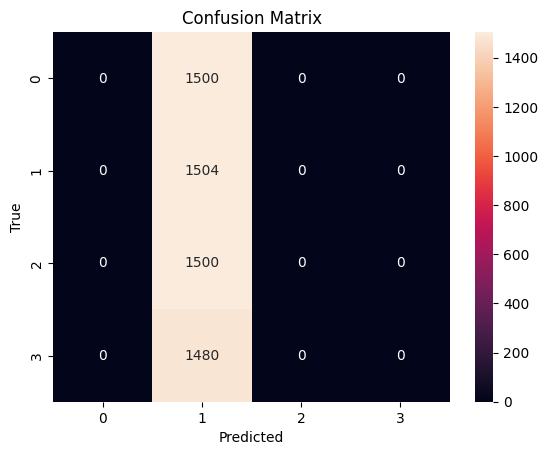

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Extract features from ResNet50 bottleneck layer
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load a pre-trained ResNet50 model without the top (classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the feature extraction model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add pooling layer
x = Dense(256, activation='relu')(x)  # Add a fully connected layer
x = Dense(10, activation='softmax')(x)  # Output layer (adjust num_classes as needed)

# Create the feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Print model summary to verify
feature_extractor.summary()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 24,061,706 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example dataset
data = load_iris()
features = data.data
labels = data.target

# Split data into training and test sets (optional but common practice)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
def risk_prediction(pred_prob):
    if pred_prob < 0.75:
        return 'Low Risk'
    else:
        return 'High Risk'

